In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/marquis03/vehicle-classification?select=test')

Dataset URL: https://www.kaggle.com/datasets/marquis03/vehicle-classification


100%|██████████| 914M/914M [00:10<00:00, 91.9MB/s]


In [ ]:
# import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
train_path = '/content/vehicle-classification/train'
valid_path = '/content/vehicle-classification/val'

In [ ]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable = False

In [ ]:
#useful for getting number of output classes
folders = glob('/content/vehicle-classification/train/*')

In [ ]:
folders

['/content/vehicle-classification/train/bus',
 '/content/vehicle-classification/train/jeep',
 '/content/vehicle-classification/train/taxi',
 '/content/vehicle-classification/train/heavy truck',
 '/content/vehicle-classification/train/SUV',
 '/content/vehicle-classification/train/racing car',
 '/content/vehicle-classification/train/family sedan',
 '/content/vehicle-classification/train/fire engine',
 '/content/vehicle-classification/train/truck',
 '/content/vehicle-classification/train/minibus']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

#create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,314,794 (85.12 MB)

 Trainable params: 512,010 (1.95 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# tell the model what cost and optimization method to used
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
#use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/vehicle-classification/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')


Found 1400 images belonging to 10 classes.


In [ ]:
# Make sure you provide the same target size as initialied for the image size
test_set = train_datagen.flow_from_directory('/content/vehicle-classification/val',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')


Found 200 images belonging to 10 classes.


In [ ]:
# fit the model
#Run the cell. It will take some time to execute

r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 590ms/step - accuracy: 0.5672 - loss: 6.2977 - val_accuracy: 0.8700 - val_loss: 1.6787
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


88/88 ━━━━━━━━━━━━━━━━━━━━ 59s 440ms/step - accuracy: 0.8677 - loss: 1.3671 - val_accuracy: 0.8550 - val_loss: 1.9578
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 436ms/step - accuracy: 0.9203 - loss: 0.8296 - val_accuracy: 0.8600 - val_loss: 2.1634
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 437ms/step - accuracy: 0.9183 - loss: 0.8349 - val_accuracy: 0.8600 - val_loss: 2.8292
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 43s 458ms/step - accuracy: 0.9232 - loss: 1.0550 - val_accuracy: 0.8350 - val_loss: 3.0698
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [ ]:
import matplotlib.pyplot as plt

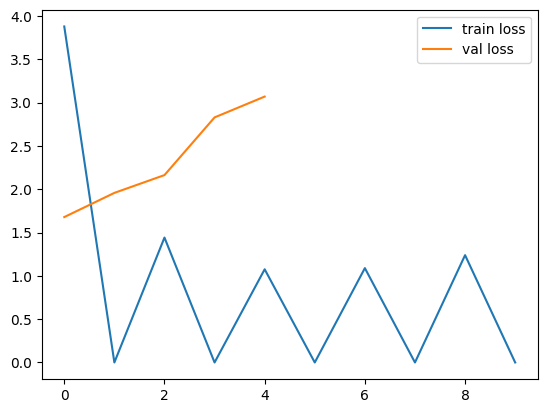

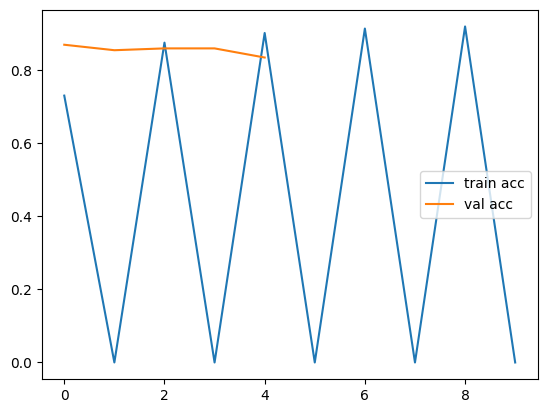

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
pip install tensorflow pillow numpy


In [ ]:
# import tensorflow as tf

# # Save the trained model first. This will create the 'model.h5' file in the current directory.
# model.save('model.h5')

# # Now, you can load the model.
# loaded_model = tf.keras.models.load_model('model.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Vehicle_Prediction(img_path):
  # Load and preprocess the image
  img = image.load_img(img_path, target_size=(224, 224))  # Assuming the model was trained on 224x224 images
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

  # Normalize the image (if required)
  img_array = img_array / 255.0  # Normalize if the model expects input between 0 and 1

  # Make predictions
  predictions = model.predict(img_array)

  # Display the predicted class (assuming the model outputs class probabilities)
  predicted_class = np.argmax(predictions, axis=-1)  # If the model outputs multi-class probabilities

  if predicted_class == [0]:
    type = 'SUV'
  elif predicted_class == [1]:
    type = 'BUS'
  elif predicted_class == [2]:
    type = 'FAMILY SEDAN'
  elif predicted_class == [3]:
    type = 'FIRE ENGINE'
  elif predicted_class == [4]:
    type = 'HEAVY TRUCK'
  elif predicted_class == [5]:
    type = 'JEEP'
  elif predicted_class == [6]:
    type = 'MINI BUS'
  elif predicted_class == [7]:
    type = 'RACING CAR'
  elif predicted_class == [8]:
    type = 'TAXI'
  elif predicted_class == [9]:
    type = 'TRUCK'

  print(f"Vehicle : {type}")



  # Display the image
  img = image.load_img(img_path)
  plt.imshow(img)
  plt.title(f"Vehicle Type: {type}")
  plt.show()








1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Vehicle : RACING CAR


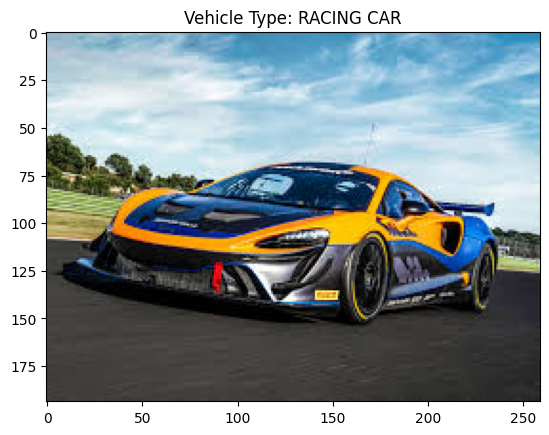

In [ ]:
Vehicle_Prediction('/content/images (6).jpg')


In [ ]:
# Save the model
model.save('vehicle_classification_model.h5')

# Download the file
from google.colab import files
files.download('vehicle_classification_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>